<a href="https://colab.research.google.com/github/Nohyunjin/DeepLearning/blob/main/%EC%86%90%EA%B8%80%EC%94%A8_%EC%9D%B8%EC%8B%9D%EC%9D%84_%EC%9C%84%ED%95%9C_CNN%EA%B5%AC%ED%98%8420220118.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X = train_X.reshape(train_X.shape[0], 28, 28, 1)
test_X = test_X.reshape(test_X.shape[0], 28, 28, 1)

train_X = train_X.astype("float32")
test_X = test_X.astype("float32")
train_X /= 255
test_X /= 255
print("train_X shape:", train_X.shape)
print(train_X.shape[0], "train samples")
print(test_X.shape[0], "test samples")

train_y = tf.keras.utils.to_categorical(train_y, 10)
test_y = tf.keras.utils.to_categorical(test_y, 10)

model = Sequential()
model.add(Conv2D(32, (5, 5), padding = 'same',input_shape = (28, 28, 1), activation = "relu",))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (5, 5), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

hist = model.fit(train_X, train_y, validation_data = (test_X, test_y),
                 batch_size = 128, epochs = 10, verbose = 1)

score = model.evaluate(test_X, test_y, verbose = 0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

train_X shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.4370 - accuracy: 0.8616 - val_loss: 0.0770 - val_accuracy: 0.9763
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1276 - accuracy: 0.9626 - val_loss: 0.0536 - val_accuracy: 0.9828
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0947 - accuracy: 0.9718 - val_loss: 0.0356 - val_accuracy: 0.9887
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0761 - accuracy: 0.9774 - val_loss: 0.0335 - val_accuracy: 0.9887
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0652 - accuracy: 0.9805 - val_loss: 0.0314 - val_accuracy: 0.9903
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0592 - accuracy: 0.9823 - val_loss: 0.0290 - val_accuracy: 0.9899
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0

In [11]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 9, 9, 32)         0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 9, 9, 32)          0         
                                                                 
 conv2d_13 (Conv2D)          (None, 5, 5, 64)          51264     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 2, 2, 64)         0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 2, 2, 64)         

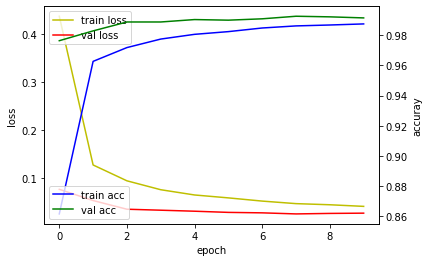

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuray')
acc_ax.legend(loc='lower left')
plt.show()